## CHAPTER 1
---
# FORESEEING VARIABLE PROBLEMS

---
## 1.1 The main libraries we will use

- **Pandas:** provides high-performance analysis tools
- **NumPy:** provides support for large, multi-dimensional arrays and matrices and contains a large collection of mathematical functions to operate over these arrays and over pandas dataframes
- **Matplotlib** and **Seaborn:** are the standard libraries for plotting and visualization
- **SciPy:** is the standard library for statistics and scientific computing
- **Scikit-Learn:** is the standard library for machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.2 The public datasets we will use

- **The KDD-CUP-98** and the **Car Evaluation** datasets are both available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
    1. [KDD-CUP-98 dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup98-mld/epsilon_mirror/)
        Follow the link, download the *cup98lrn.zip*, and save the *cup98LRN.txt* in the folder of choice 
    2. [Care Evaluation dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/car/)
        Follow the link, download the *car.data* file, and save the file in the folder of choice
        
        
- **The Titanic** dataset is available at [OpenML](https://www.openml.org/) Run the code below to download the data and store it as a *titanic.csv* file in the folder of your choice

In [2]:
import pandas as pd
import numpy as np

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan 
    
url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
data = pd.read_csv(url)
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('data/titanic.csv', index=False)

## 1.3 Identifying numerical and categorical variables

#### Getting ready
When stored in Pandas:
- Discrete variables are usually of the *int type*, 
- Continuous variables are usually of the *float type*, and 
- Categorical variables are usually of the *object type*

However, discrete variables can also be cast as floats, while numerical variables can be cast as objects. Therefore, to correctly identify variable types, we need to look at the data type and inspect their values as well. 

#### How to do it...

In [3]:
# Load the libraries that are required for the task
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the dataset and inspect the first few rows
data = pd.read_csv('data/titanic.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# Inspect the variable types
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
# Inspect unique values - discrete variable
data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [7]:
# Inspect unique values - continuous variable
data['fare'].unique()[0:10]

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ])

In [8]:
# Inspect unique values - categorical variable
data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [9]:
# Inspect unique values - mixed variable
data['cabin'].unique()[0:10]

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23'],
      dtype=object)

#### Using visualizations to understand variable types
- Histograms of discrete variables often show a bar plot shape, instead of continuous intervals
- Histogram of continuous variable often show continuous intervals
- Bar plots can be used to visualize categorical variables

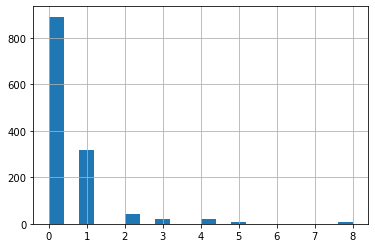

In [10]:
# The 'sibsp' value range was divided into 20 intervals
data['sibsp'].hist(bins=20)

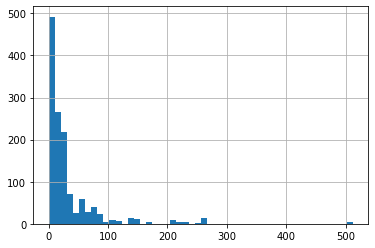

In [11]:
# The 'fare' value range was divided into 50 intervals
data['fare'].hist(bins=50)

Text(0.5, 1.0, 'Embarked - Port')

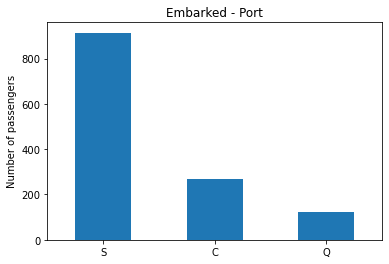

In [12]:
data['embarked'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of passengers')
plt.title('Embarked - Port')

## 1.4 Quantifying missing data

Scikit-learn, the Python library for machine learning, does not support missing values as input for machine learning models, so we need to convert these values into numbers. To select the missing data imputation technique, it is important to know about the amount of missing information in our variables. In this section, we will learn how to:
- Identify and quantify missing data using Pandas and 
- Make plots with the percentages of missing data per variable

Dataset: KDD-CUP-98 dataset, file name is **cup98LRN**

In [13]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# To display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [14]:
# Let's load a few variables from the dataset into a pandas dataframe and inspect the first five rows
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN',
        'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE',
       ]
# Load the dataset
path = 'data/large/cup98LRN.txt'
data = pd.read_csv(path, usecols=cols)

# Let's inspect the first 5 rows
data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [15]:
# Let's calculate the number of missing values in each variable
data.isnull().sum()

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

In [16]:
# Let's quantify the percentage of missing values in each variable
data.isnull().mean()

AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

Text(0.5, 1.0, 'Quantifying Missing Data')

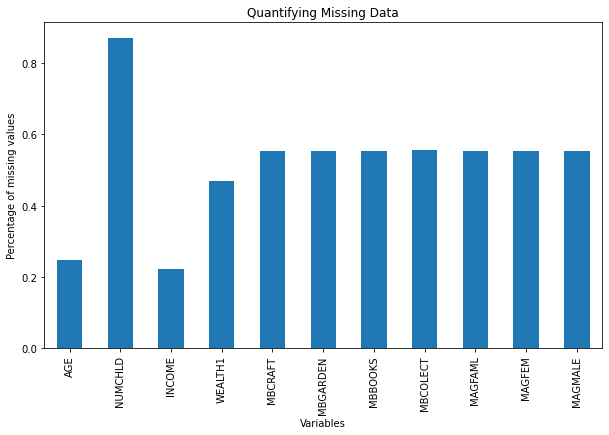

In [17]:
# Finally, let's make a bar plot with the percentage of missing values per variable
data.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying Missing Data')

## 1.5 Determining cardinality in categorical variables

- The *number of unique categories in a variable* is called **cardinality**
- For example, 
    - The cardinality of the Gender variable, which takes values of female and male, is 2, whereas
    - The cardinality of the Civil status variable, which takes values of married, divorced, singled, and widowed, is 4. 
- In this section, we will learn how to quantify and create plots of the cardinality of categorical variables using Pandas and Matplotlib.
- Dataset: KDD-CUP-98 dataset, file name is **cup98LRN** (same as in previous section)

In [18]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Let's load a few categorical variables from the dataset
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'DOMAIN', 'RFA_15']

# Load the dataset
path = 'data/large/cup98LRN.txt'
data = pd.read_csv(path, usecols=cols)

# Let's inspect the first 5 rows
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,,X


In [20]:
# Let's replace the empty strings with NaN values
data = data.replace(' ', np.nan)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [21]:
# Let's determine the cardinality of each variable
data.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

The nunique() method ignores missing values by default. If we want to consider missing values as an additional category, we should set the dropna argument to False: **data.nunique(dropna=False)**.

In [22]:
data.nunique(dropna=False)

DOMAIN      17
GENDER       7
RFA_2       14
RFA_15      34
MDMAUD_A     5
dtype: int64

In [23]:
# Let's print out the unique categories of the GENDER variable
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

Pandas nunique() can be used in the entire dataframe. Pandas unique(), on the other hand, works only on a pandas Series. Thus, we need to specify the column name that we want to return the unique values for.

Text(0.5, 1.0, 'Cardinality')

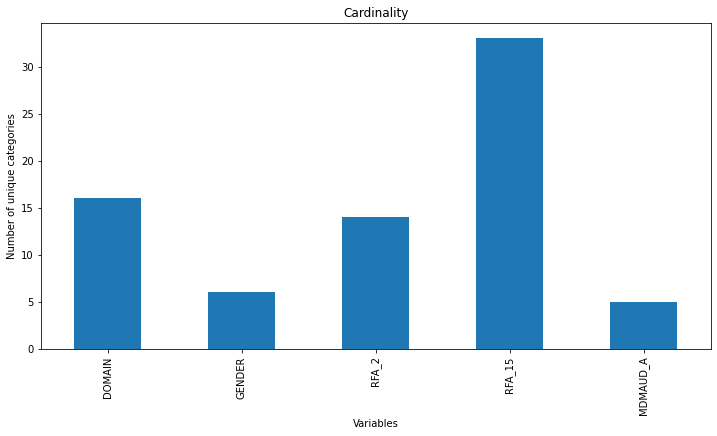

In [24]:
# Let's plot the cardinality of each variable
data.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

The nunique() method determines the number of unique values for categorical and numerical variables. In this recipe, we only used nunique() on categorical variables to explore the concept of cardinality. However, we could also use **nunique() to evaluate numerical variables**. We can also evaluate the cardinality of a **subset of the variables** in a dataset by slicing the dataframe.

In [25]:
data[['RFA_2', 'MDMAUD_A', 'RFA_15']].nunique()

RFA_2       14
MDMAUD_A     5
RFA_15      33
dtype: int64

## 1.6 Pinpointing rare categories in categorical variables

Rare categories, are those that are only present for a tiny minority of the observations in the dataset. Normally, we consider anything under 5% or 1% a rare occurrence. In this section, we will learn to quantify and visualize the frequency of rare categories, utilizing the Car Evaluation dataset file: **car.data**) from the UCI Machine Learning Repository.

In [26]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Let's load the Car Evaluation dataset and display the first five rows
path = 'data/car.data'
data = pd.read_csv(path)
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


By default, pandas read_csv() uses the first row of the data as the column names. If the column names are not part of the raw data, we need to specifically tell pandas not to assign the column names by adding the **header = None** argument.

In [28]:
# Let's load the dataset again, add column names manually, and display the first five rows
data = pd.read_csv(path, header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [29]:
# Let's find the cardinality of the 'class' variable
data['class'].nunique()

4

In [30]:
# Let's inspect the names of the categories in 'class'
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [31]:
# Let's calculate the number of cars per category of the 'class' variable
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [32]:
# Let's calculate and inspect the frequency for each category
label_freq = data['class'].value_counts() / len(data)
label_freq

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

In [33]:
# Same goal as above but better code
total_cars = len(data)
print('Total number of cars {}'.format(total_cars))

label_freq = data['class'].value_counts() / total_cars
label_freq

Total number of cars 1728


unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

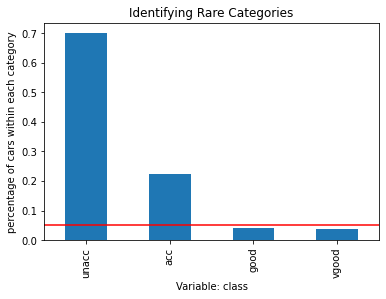

In [34]:
# Let's make a bar plot showing the frequency of each category and highlight the 5% mark with a red line
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

To make a plot of the category frequency, we sorted the categories in label_freq from that of most cars to that of the fewest cars using the pandas **sort_values()** method. Next, we used plot.bar() to produce a bar plot. With axhline(), from Matplotlib, we added a horizontal red line at the height of 0.05 to indicate the 5% percentage limit, under which we considered a category as rare. We added x and y labels and a title with plt.xlabel(), plt.ylabel(), and plt.title() from Matplotlib.

## 1.7 Identifying a linear relationship

- Linear models assume that the independent variables, X, take a linear relationship with the dependent variable, Y. Failure to meet this assumption may result in poor model performance. 
- Linear relationships can be evaluated by scatter plots and residual plots. 
    Scatter plots output the relationship of the independent variable X and the target Y. 
    Residuals are the difference between the linear estimation of Y using X and the real target: 
        *error = target - predictions*. 
- If the relationship is linear, the residuals should follow a normal distribution centered at zero, while the values should vary homogeneously along the values of the independent variable. 
- In this section, we will learn how to visualize the linear relationships between X and Y.

In [35]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

In [36]:
# Let's load the the Boston House price data from scikit-learn
boston_dataset = load_boston()

# Create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# Add the target column
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's get the information about the boston house price dataset to get familiar with the variables before continuing with our task. The aim is to predict the "Median value of the houses" (MEDV column) of this dataset and we have variables with characteristics about the homes and the neighborhoods.

In [37]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Let's first see what a linear relationship should look like

In [38]:
# Let's generate simulated data that will show a linear relationship
np.random.seed(29) # for reproducibility
n = 200 
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Text(0.5, 6.79999999999999, 'Independent variable')

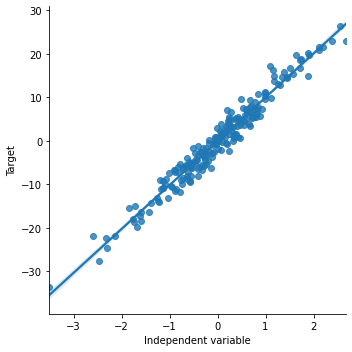

In [39]:
# Let's show the linear relationship between X and Y on a scatter-plot
sns.lmplot(x="x", y="y", data=data, order=1)
# order 1 indicates that we want seaborn to estimate a linear model 
# (the line in the plot below) between x and y
plt.ylabel('Target')
plt.xlabel('Independent variable')

#### Let's now make a scatter plot for the boston house price dataset

We plot the variable LAST (% lower status of the population) vs. the target MEDV (median value of the house)

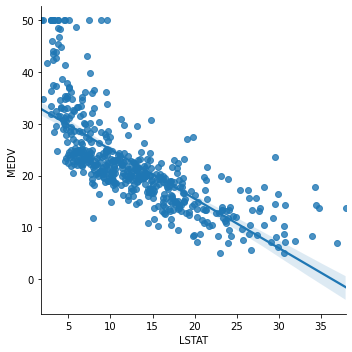

In [40]:
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

Although not perfect, the relationship is fairly linear.

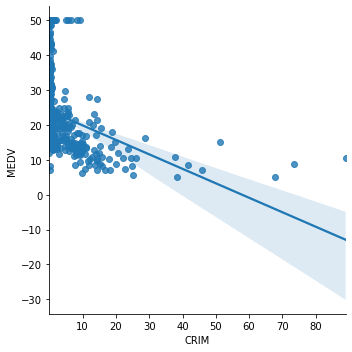

In [41]:
# Let's plot CRIM vs. MEDV
sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

#### Assessing linear relationships can by evaluating the residuals on simulated data
Residuals are the difference between the value estimated by the linear relationship and the real output. If the relationship is linear, the residuals should be normally distributed and centered around zero.
- Step 1: build and fit a linear model
- Step 2: make predictions with the model
- Step 3: calculate the residuals (error)
- Step 4: make a scatter plot of the predicted vs real
- Step 5: observe the distribution of the residuals

Text(0, 0.5, 'Real value')

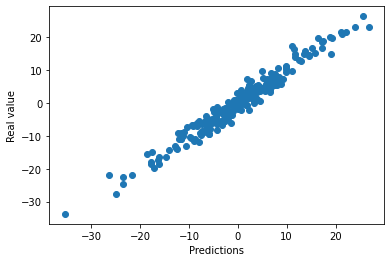

In [42]:
lr = LinearRegression()
lr.fit(data['x'].to_frame(), data['y'])

pred = lr.predict(data['x'].to_frame())

error = data['y'] - pred

plt.scatter(x=pred, y=data['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

*Residuals plots:* if the relationship is linear, the noise should be random, centered around zero, and follow a normal distribution. We are plotting the error terms vs the independent variable x. Error values should be around 0 and homogeneously distributed

Text(0.5, 0, 'Independent variable x')

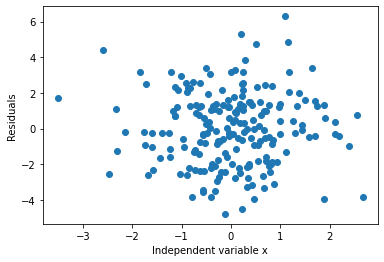

In [43]:
plt.scatter(y=error, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

We can also observe the distribution of the errors by plotting a histogram of the residuals. They should follow a gaussian distribution centered around 0

Text(0.5, 0, 'Residuals')

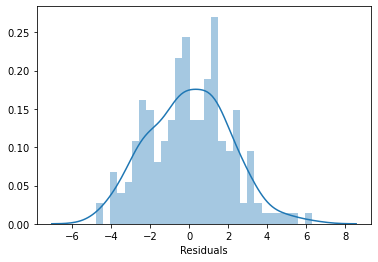

In [44]:
sns.distplot(error, bins=30)
plt.xlabel('Residuals')

#### Evaluating the residuals on the boston dataset

Text(0, 0.5, 'MEDV')

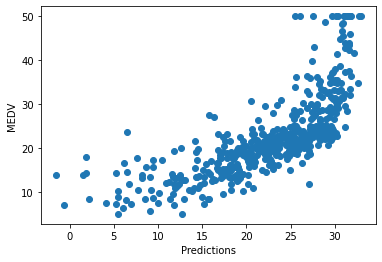

In [45]:
lr = LinearRegression()
lr.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

pred = lr.predict(boston['LSTAT'].to_frame())

error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

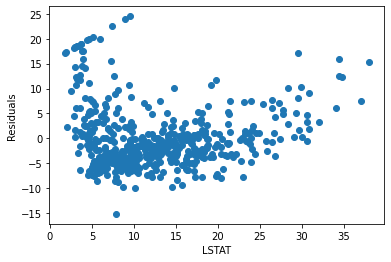

In [46]:
# Residuals plot
# The noise should be random, centered around zero, and follow a normal distribution
plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

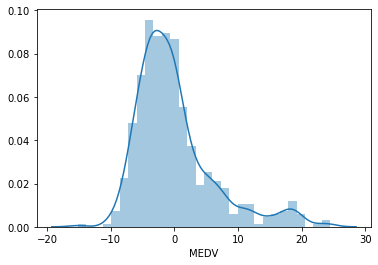

In [47]:
# Plot a histogram of the residuals
# They should follow a gaussian distribution
sns.distplot(error, bins=30)

For this particular case, the residuals are centered around zero, but they are not homogeneously distributed across the values of LSTAT. Bigger and smaller values of LSTAT show higher residual values. In addition, we see in the histogram that the residuals do not adopt a strictly Gaussian distribution.

## 1.8 Identifying a normal distribution

Linear models assume that the independent variables are normally distributed. Let's learn how to assess normal distributions of variables.

In [48]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

In [49]:
# Let's create a dataframe with the variable x that was defined above
data = pd.DataFrame([x]).T
data.columns = ['x']
data.head()

,x
0,-0.417482
1,0.706032
2,1.915985
3,-2.141755
4,0.719057


#### Using histograms to assess normality

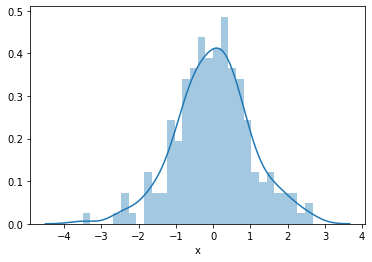

In [50]:
# Histogram of simulated data
sns.distplot(data['x'], bins=30)

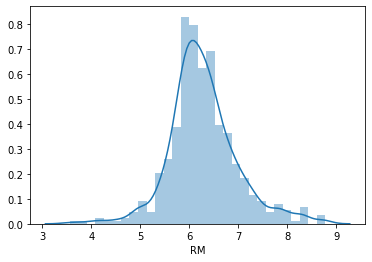

In [51]:
# Let's plot the variable RM (rooms per dwelling) from the boston dataset 
sns.distplot(boston['RM'], bins=30)

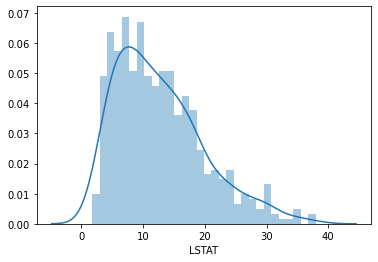

In [52]:
# Let's plot the variable LSTAT (% lower status of the population)
sns.distplot(boston['LSTAT'], bins=30)

#### Using Q-Q plots to assess normality
In a Q-Q plot we plot the quantiles of the variable in the y-axis and the expected quantiles of the normal distribution in the x-axis. If the variable follows a normal distribution, the dots in the Q-Q plot should fall in a 45 degree diagonal line as indicated below.

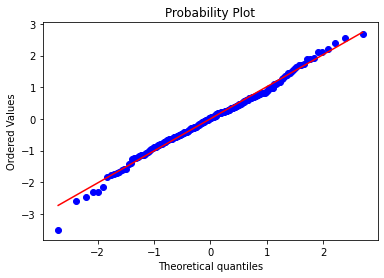

In [53]:
# Q-Q plot of simulated data
stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

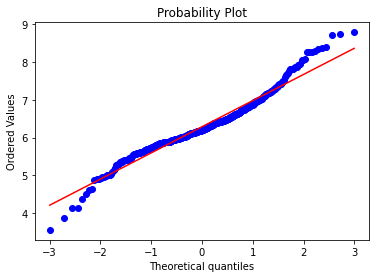

In [54]:
# Q-Q plot of RM
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

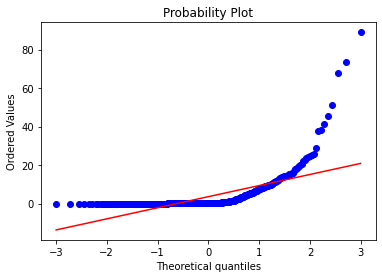

In [55]:
# Q-Q plot of CRIM
stats.probplot(boston['CRIM'], dist="norm", plot=plt)
plt.show()

CRIM does not follow a Gaussian distribution as most of its observations deviate from the 45 degree line in the Q-Q plot.

**A Q-Q plot** is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. 

**Quantile**: similar to percentile. 0.1 quantile means that 10th percentile, 0.5 quantile means 50th percentile.

## 1.9 Distinguishing variable distribution

- A probability distribution is a function that describes the likelihood of obtaining the possible values of a variable. 
- There are many well-described variable distributions, such as the normal, binomial, or Poisson distributions. 
- Some machine learning algorithms assume that the independent variables are normally distributed. Other models make no assumptions about the distribution of the variables, but a better spread of these values may improve their performance. 
- In this section, we will learn how to create plots to distinguish the variable distributions in the entire dataset by using the Boston House Prices dataset.

In [56]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

In [57]:
# We already have the boston dataframe from previous sections
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


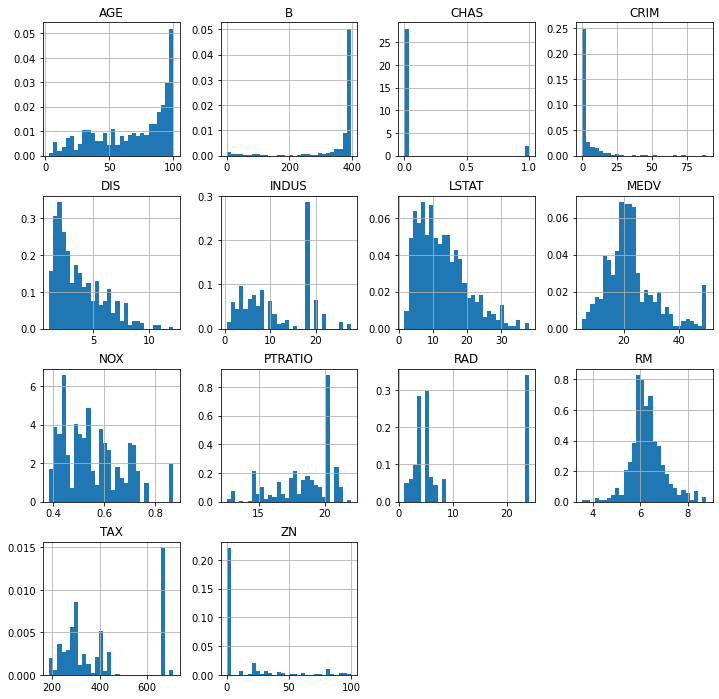

In [58]:
# Let's plot the entire dataset
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

Most of the numerical variables in the dataset are skewed

To display the histograms of all the numerical variables, we used pandas hist(), which calls matplotlib.pyplot.hist() on each variable in the dataframe, resulting in one histogram per variable. We indicated the number of intervals for the histograms using the bins argument, adjusted the figure size with figsize, and normalized the histogram by setting density to True. If the histogram is normalized, the sum of the area under the curve is 1.

## 1.10 Highlighting outliers

An outlier is a data point which is significantly different from the remaining data. "*An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism*." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

In this recipe, we will learn to identify outliers using boxplots and the inter-quantile range proximity rule.

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

where the inter-quantile range (IQR) is given by:

- IQR = 75th quantile - 25th quantile

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# boston house dataset for the demo
from sklearn.datasets import load_boston

In [60]:
boston_dataset = load_boston()

# Let's use only 3 variables for this demo
cols = ['RM', 'LSTAT', 'CRIM']
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[cols]
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


Text(0.5, 1.0, 'Boxplot')

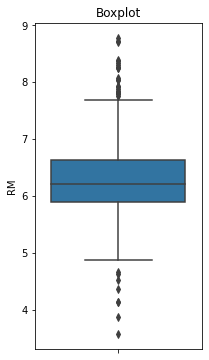

In [61]:
# Let's make a boxplot for RM
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

In the boxplot displayed above: 
- The IQR (inter-quartile range) is indicated by the box, 
- The median is indicated by the horizontal line within the box, 
- The top and bottom edges of the box correspond to the 75th and 25th percentiles, respectively, and 
- The whiskers mark the proximity rule boundaries as described above. 
- Outliers are the values that fall outside the whiskers 

To find the outliers in a variable, we need to find the distribution boundaries according to the IQR proximity rule. Create a function that takes a dataframe, a variable name, and the factor to use in the IQR calculation and returns the IQR proximity rule boundaries

In [62]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730499999999999, 4.778500000000001)

In [63]:
# Let's flag the outliers in the dataset
outliers = np.where(boston['RM'] > upper_boundary, True,
                    np.where(boston['RM'] < lower_boundary, True, False))

# How many outliers did we find?
outliers.sum()

30

In [64]:
# let's print a few of them
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [65]:
# Let's remove the outliers and see what's left
tmp = boston.loc[~outliers, 'RM']
tmp.shape

(476,)

**Notes:**
- While creating the boston dataframe, to retain only the RM, LSTAT, and CRIM variables, we passed the column names in double brackets [[]] at the back of pandas DataFrame().
- To find the outliers of RM, we used NumPy's where() method, which produced a boolean vector with True if the value was an outlier. Briefly, where() scanned the rows of the RM variable, and if the value was bigger than the upper boundary, it assigned True, whereas if the value was smaller, the second where() nested inside the first one and checked whether the value was smaller than the lower boundary, in which case it also assigned True, otherwise False. 
- Finally, we used the loc[] method from pandas to capture only those values in the RM variable that were outliers in a new dataframe.

## 1.11 Comparing feature magnitude

- Many machine learning algorithms are sensitive to the scale of the features. 
- For example, the coefficients of linear models are directly informed by the scale of the feature. 
- In addition, features with bigger value ranges tend to dominate over features with smaller ranges. 
- Having features within a similar scale also helps algorithms converge faster, thus improving performance and training times. - In this section, we will explore and compare feature magnitude by looking at statistical parameters such as the mean, median, standard deviation, and maximum and minimum values by leveraging the power of Pandas.

In [66]:
import pandas as pd

# the dataset for the demo
from sklearn.datasets import load_boston

In [67]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [68]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [70]:
# Let's calculate the value range of each variable
data.max() - data.min()

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
dtype: float64

The ranges of the variables, as expected are quite different.